In [2]:
import pandas as pd
import numpy as np
import seaborn as sns

from matplotlib import pyplot as plt
from sklearn import neighbors
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn import preprocessing
from sklearn.preprocessing import MinMaxScaler

Data_w = pd.read_csv("weather_data.csv")
Data_p = pd.read_csv("price_demand_data.csv")

Data_w

,Date,Minimum temperature (°C),Maximum temperature (°C),Rainfall (mm),Evaporation (mm),Sunshine (hours),Direction of maximum wind gust,Speed of maximum wind gust (km/h),Time of maximum wind gust,9am Temperature (°C),...,9am cloud amount (oktas),9am wind direction,9am wind speed (km/h),9am MSL pressure (hPa),3pm Temperature (°C),3pm relative humidity (%),3pm cloud amount (oktas),3pm wind direction,3pm wind speed (km/h),3pm MSL pressure (hPa)
0,1/01/2021,15.6,29.9,0.0,2.8,9.3,NE,31,13:14,19.2,...,6,N,2,1018.8,28.1,43,5,E,13,1015.3
1,2/01/2021,18.4,29.0,0.0,9.4,1.3,NW,30,8:22,23.3,...,7,NW,17,1013.3,28.7,38,7,SW,4,1008.5
2,3/01/2021,17.0,26.2,12.6,4.8,7.1,SW,33,17:55,18.3,...,8,SW,4,1007.7,23.5,59,4,SW,2,1005.2
3,4/01/2021,16.0,18.6,2.6,3.8,0.0,SE,41,16:03,16.2,...,8,SE,11,1010.0,18.2,82,8,SW,17,1011.0
4,5/01/2021,15.9,19.1,11.2,1.0,0.0,SE,35,11:02,17.2,...,8,SE,13,1012.5,18.2,82,8,SE,19,1013.3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
213,24/08/2021,6.4,13.1,10.4,4.0,6.2,S,39,9:38,10.8,...,7,SE,17,1021.5,11.7,55,6,S,17,1021.6
214,25/08/2021,8.0,14.1,2.2,1.2,5.4,S,37,16:26,12.1,...,3,SE,15,1023.3,13.4,59,6,SW,17,1021.8
215,28/08/2021,5.3,17.8,0.0,1.6,9.6,N,39,13:14,9.1,...,1,N,7,1018.6,17.4,31,3,NW,24,1013.5
216,29/08/2021,9.1,16.2,0.6,6.4,4.3,NE,33,1:50,10.6,...,7,N,13,1011.4,12.8,84,7,S,6,1010.4


In [3]:
 #check the data types 
Data_w.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 218 entries, 0 to 217
Data columns (total 21 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Date                               218 non-null    object 
 1   Minimum temperature (°C)           218 non-null    float64
 2   Maximum temperature (°C)           218 non-null    float64
 3   Rainfall (mm)                      218 non-null    float64
 4   Evaporation (mm)                   218 non-null    float64
 5   Sunshine (hours)                   218 non-null    float64
 6   Direction of maximum wind gust     218 non-null    object 
 7   Speed of maximum wind gust (km/h)  218 non-null    int64  
 8   Time of maximum wind gust          218 non-null    object 
 9   9am Temperature (°C)               218 non-null    float64
 10  9am relative humidity (%)          218 non-null    int64  
 11  9am cloud amount (oktas)           218 non-null    int64  

In [5]:
# change the Date column into date time format
Data_w["Date"] = pd.to_datetime(Data_w["Date"])
Data_w["Date"]

0     2021-01-01
1     2021-02-01
2     2021-03-01
3     2021-04-01
4     2021-05-01
         ...    
213   2021-08-24
214   2021-08-25
215   2021-08-28
216   2021-08-29
217   2021-08-30
Name: Date, Length: 218, dtype: datetime64[ns]

In [6]:
# the date type has been changed to date time format, assign to original 
Data_w["Date"] = Data_w["Date"] = pd.to_datetime(Data_w["Date"])
Data_w["Date"]

0     2021-01-01
1     2021-02-01
2     2021-03-01
3     2021-04-01
4     2021-05-01
         ...    
213   2021-08-24
214   2021-08-25
215   2021-08-28
216   2021-08-29
217   2021-08-30
Name: Date, Length: 218, dtype: datetime64[ns]

In [7]:
# Load DataFrame table
Data_w

,Date,Minimum temperature (°C),Maximum temperature (°C),Rainfall (mm),Evaporation (mm),Sunshine (hours),Direction of maximum wind gust,Speed of maximum wind gust (km/h),Time of maximum wind gust,9am Temperature (°C),...,9am cloud amount (oktas),9am wind direction,9am wind speed (km/h),9am MSL pressure (hPa),3pm Temperature (°C),3pm relative humidity (%),3pm cloud amount (oktas),3pm wind direction,3pm wind speed (km/h),3pm MSL pressure (hPa)
0,2021-01-01,15.6,29.9,0.0,2.8,9.3,NE,31,13:14,19.2,...,6,N,2,1018.8,28.1,43,5,E,13,1015.3
1,2021-02-01,18.4,29.0,0.0,9.4,1.3,NW,30,8:22,23.3,...,7,NW,17,1013.3,28.7,38,7,SW,4,1008.5
2,2021-03-01,17.0,26.2,12.6,4.8,7.1,SW,33,17:55,18.3,...,8,SW,4,1007.7,23.5,59,4,SW,2,1005.2
3,2021-04-01,16.0,18.6,2.6,3.8,0.0,SE,41,16:03,16.2,...,8,SE,11,1010.0,18.2,82,8,SW,17,1011.0
4,2021-05-01,15.9,19.1,11.2,1.0,0.0,SE,35,11:02,17.2,...,8,SE,13,1012.5,18.2,82,8,SE,19,1013.3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
213,2021-08-24,6.4,13.1,10.4,4.0,6.2,S,39,9:38,10.8,...,7,SE,17,1021.5,11.7,55,6,S,17,1021.6
214,2021-08-25,8.0,14.1,2.2,1.2,5.4,S,37,16:26,12.1,...,3,SE,15,1023.3,13.4,59,6,SW,17,1021.8
215,2021-08-28,5.3,17.8,0.0,1.6,9.6,N,39,13:14,9.1,...,1,N,7,1018.6,17.4,31,3,NW,24,1013.5
216,2021-08-29,9.1,16.2,0.6,6.4,4.3,NE,33,1:50,10.6,...,7,N,13,1011.4,12.8,84,7,S,6,1010.4


In [8]:
# Load Data Table
Data_p

,REGION,SETTLEMENTDATE,TOTALDEMAND,PRICECATEGORY
0,VIC1,1/01/2021 0:30,4179.21,LOW
1,VIC1,1/01/2021 1:00,4047.76,LOW
2,VIC1,1/01/2021 1:30,3934.70,LOW
3,VIC1,1/01/2021 2:00,3766.45,LOW
4,VIC1,1/01/2021 2:30,3590.37,LOW
...,...,...,...,...
11659,VIC1,31/08/2021 22:00,4861.91,MEDIUM
11660,VIC1,31/08/2021 22:30,4748.74,MEDIUM
11661,VIC1,31/08/2021 23:00,4620.09,MEDIUM
11662,VIC1,31/08/2021 23:30,4834.00,MEDIUM


In [9]:
# Check the data type in all the columns
Data_p.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11664 entries, 0 to 11663
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   REGION          11664 non-null  object 
 1   SETTLEMENTDATE  11664 non-null  object 
 2   TOTALDEMAND     11664 non-null  float64
 3   PRICECATEGORY   11664 non-null  object 
dtypes: float64(1), object(3)
memory usage: 364.6+ KB


In [10]:
# We need to extract the dates from date_time data from the settlement date column, for that we convert the column type to datetime format instead of object type
Data_p["Date"] = pd.to_datetime(Data_p["SETTLEMENTDATE"])
Data_p["Date"]

0       2021-01-01 00:30:00
1       2021-01-01 01:00:00
2       2021-01-01 01:30:00
3       2021-01-01 02:00:00
4       2021-01-01 02:30:00
                ...        
11659   2021-08-31 22:00:00
11660   2021-08-31 22:30:00
11661   2021-08-31 23:00:00
11662   2021-08-31 23:30:00
11663   2021-01-09 00:00:00
Name: Date, Length: 11664, dtype: datetime64[ns]

In [11]:
#from datetime import date
Data_p["Date"].dt.date


0        2021-01-01
1        2021-01-01
2        2021-01-01
3        2021-01-01
4        2021-01-01
            ...    
11659    2021-08-31
11660    2021-08-31
11661    2021-08-31
11662    2021-08-31
11663    2021-01-09
Name: Date, Length: 11664, dtype: object

In [12]:
# Assign it into the original Data table
Data_p["Date"] = Data_p["Date"].dt.date

In [13]:
Data_p

,REGION,SETTLEMENTDATE,TOTALDEMAND,PRICECATEGORY,Date
0,VIC1,1/01/2021 0:30,4179.21,LOW,2021-01-01
1,VIC1,1/01/2021 1:00,4047.76,LOW,2021-01-01
2,VIC1,1/01/2021 1:30,3934.70,LOW,2021-01-01
3,VIC1,1/01/2021 2:00,3766.45,LOW,2021-01-01
4,VIC1,1/01/2021 2:30,3590.37,LOW,2021-01-01
...,...,...,...,...,...
11659,VIC1,31/08/2021 22:00,4861.91,MEDIUM,2021-08-31
11660,VIC1,31/08/2021 22:30,4748.74,MEDIUM,2021-08-31
11661,VIC1,31/08/2021 23:00,4620.09,MEDIUM,2021-08-31
11662,VIC1,31/08/2021 23:30,4834.00,MEDIUM,2021-08-31


In [14]:
# convert the date into datetime format
Data_p["Date"]= pd.to_datetime(Data_p["Date"])
Data_p["Date"]

0       2021-01-01
1       2021-01-01
2       2021-01-01
3       2021-01-01
4       2021-01-01
           ...    
11659   2021-08-31
11660   2021-08-31
11661   2021-08-31
11662   2021-08-31
11663   2021-01-09
Name: Date, Length: 11664, dtype: datetime64[ns]

In [16]:
# assign to original
Data_p["Date"]=Data_p["Date"]= pd.to_datetime(Data_p["Date"])
Data_p["Date"]

0       2021-01-01
1       2021-01-01
2       2021-01-01
3       2021-01-01
4       2021-01-01
           ...    
11659   2021-08-31
11660   2021-08-31
11661   2021-08-31
11662   2021-08-31
11663   2021-01-09
Name: Date, Length: 11664, dtype: datetime64[ns]

In [15]:
#Now make them as groups and find the median value_DataMining
Data_pg = Data_p.groupby("Date").max("TOTALDEMAND")
Data_pg

,TOTALDEMAND
Date,
2021-01-01,5019.64
2021-01-02,5228.29
2021-01-03,5225.37
2021-01-04,5807.02
2021-01-05,5261.09
...,...
2021-12-04,6415.58
2021-12-05,6406.00
2021-12-06,6062.58


In [16]:
Data_p["TOTALDEMAND"].describe()

count    11664.000000
mean      4925.798454
std        876.407490
min       2708.530000
25%       4255.500000
50%       4803.755000
75%       5477.337500
max       8196.830000
Name: TOTALDEMAND, dtype: float64

In [17]:
#The merged dataframe is assigned as MergeData
MergeData = Data_w.merge(Data_pg, how = 'inner', on = 'Date') 
MergeData

,Date,Minimum temperature (°C),Maximum temperature (°C),Rainfall (mm),Evaporation (mm),Sunshine (hours),Direction of maximum wind gust,Speed of maximum wind gust (km/h),Time of maximum wind gust,9am Temperature (°C),...,9am wind direction,9am wind speed (km/h),9am MSL pressure (hPa),3pm Temperature (°C),3pm relative humidity (%),3pm cloud amount (oktas),3pm wind direction,3pm wind speed (km/h),3pm MSL pressure (hPa),TOTALDEMAND
0,2021-01-01,15.6,29.9,0.0,2.8,9.3,NE,31,13:14,19.2,...,N,2,1018.8,28.1,43,5,E,13,1015.3,5019.64
1,2021-02-01,18.4,29.0,0.0,9.4,1.3,NW,30,8:22,23.3,...,NW,17,1013.3,28.7,38,7,SW,4,1008.5,4964.35
2,2021-03-01,17.0,26.2,12.6,4.8,7.1,SW,33,17:55,18.3,...,SW,4,1007.7,23.5,59,4,SW,2,1005.2,4503.31
3,2021-04-01,16.0,18.6,2.6,3.8,0.0,SE,41,16:03,16.2,...,SE,11,1010.0,18.2,82,8,SW,17,1011.0,4764.18
4,2021-05-01,15.9,19.1,11.2,1.0,0.0,SE,35,11:02,17.2,...,SE,13,1012.5,18.2,82,8,SE,19,1013.3,4800.64
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
213,2021-08-24,6.4,13.1,10.4,4.0,6.2,S,39,9:38,10.8,...,SE,17,1021.5,11.7,55,6,S,17,1021.6,6717.65
214,2021-08-25,8.0,14.1,2.2,1.2,5.4,S,37,16:26,12.1,...,SE,15,1023.3,13.4,59,6,SW,17,1021.8,6736.80
215,2021-08-28,5.3,17.8,0.0,1.6,9.6,N,39,13:14,9.1,...,N,7,1018.6,17.4,31,3,NW,24,1013.5,5716.32
216,2021-08-29,9.1,16.2,0.6,6.4,4.3,NE,33,1:50,10.6,...,N,13,1011.4,12.8,84,7,S,6,1010.4,6227.89


In [18]:
# Average daily temperature

temp = MergeData.loc[:, "Minimum temperature (°C)":"Maximum temperature (°C)"]
MergeData['Average_temp_/day(°C)'] = temp.mean(axis = 1)
MergeData

,Date,Minimum temperature (°C),Maximum temperature (°C),Rainfall (mm),Evaporation (mm),Sunshine (hours),Direction of maximum wind gust,Speed of maximum wind gust (km/h),Time of maximum wind gust,9am Temperature (°C),...,9am wind speed (km/h),9am MSL pressure (hPa),3pm Temperature (°C),3pm relative humidity (%),3pm cloud amount (oktas),3pm wind direction,3pm wind speed (km/h),3pm MSL pressure (hPa),TOTALDEMAND,Average_temp_/day(°C)
0,2021-01-01,15.6,29.9,0.0,2.8,9.3,NE,31,13:14,19.2,...,2,1018.8,28.1,43,5,E,13,1015.3,5019.64,22.75
1,2021-02-01,18.4,29.0,0.0,9.4,1.3,NW,30,8:22,23.3,...,17,1013.3,28.7,38,7,SW,4,1008.5,4964.35,23.70
2,2021-03-01,17.0,26.2,12.6,4.8,7.1,SW,33,17:55,18.3,...,4,1007.7,23.5,59,4,SW,2,1005.2,4503.31,21.60
3,2021-04-01,16.0,18.6,2.6,3.8,0.0,SE,41,16:03,16.2,...,11,1010.0,18.2,82,8,SW,17,1011.0,4764.18,17.30
4,2021-05-01,15.9,19.1,11.2,1.0,0.0,SE,35,11:02,17.2,...,13,1012.5,18.2,82,8,SE,19,1013.3,4800.64,17.50
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
213,2021-08-24,6.4,13.1,10.4,4.0,6.2,S,39,9:38,10.8,...,17,1021.5,11.7,55,6,S,17,1021.6,6717.65,9.75
214,2021-08-25,8.0,14.1,2.2,1.2,5.4,S,37,16:26,12.1,...,15,1023.3,13.4,59,6,SW,17,1021.8,6736.80,11.05
215,2021-08-28,5.3,17.8,0.0,1.6,9.6,N,39,13:14,9.1,...,7,1018.6,17.4,31,3,NW,24,1013.5,5716.32,11.55
216,2021-08-29,9.1,16.2,0.6,6.4,4.3,NE,33,1:50,10.6,...,13,1011.4,12.8,84,7,S,6,1010.4,6227.89,12.65


In [19]:
# Renaming TOTALDEMAND to MAXDEMAND
MergeData.rename(columns = {'TOTALDEMAND':'MAXDEMAND'}, inplace = True)
display(MergeData.head())

,Date,Minimum temperature (°C),Maximum temperature (°C),Rainfall (mm),Evaporation (mm),Sunshine (hours),Direction of maximum wind gust,Speed of maximum wind gust (km/h),Time of maximum wind gust,9am Temperature (°C),...,9am wind speed (km/h),9am MSL pressure (hPa),3pm Temperature (°C),3pm relative humidity (%),3pm cloud amount (oktas),3pm wind direction,3pm wind speed (km/h),3pm MSL pressure (hPa),MAXDEMAND,Average_temp_/day(°C)
0,2021-01-01,15.6,29.9,0.0,2.8,9.3,NE,31,13:14,19.2,...,2,1018.8,28.1,43,5,E,13,1015.3,5019.64,22.75
1,2021-02-01,18.4,29.0,0.0,9.4,1.3,NW,30,8:22,23.3,...,17,1013.3,28.7,38,7,SW,4,1008.5,4964.35,23.70
2,2021-03-01,17.0,26.2,12.6,4.8,7.1,SW,33,17:55,18.3,...,4,1007.7,23.5,59,4,SW,2,1005.2,4503.31,21.60
3,2021-04-01,16.0,18.6,2.6,3.8,0.0,SE,41,16:03,16.2,...,11,1010.0,18.2,82,8,SW,17,1011.0,4764.18,17.30
4,2021-05-01,15.9,19.1,11.2,1.0,0.0,SE,35,11:02,17.2,...,13,1012.5,18.2,82,8,SE,19,1013.3,4800.64,17.50


Pearson r is  0.4512538011046844 in summer time
Pearson r is  -0.7205974296273788 in Autumn time
Pearson r is  -0.6945727109976217 in winter time


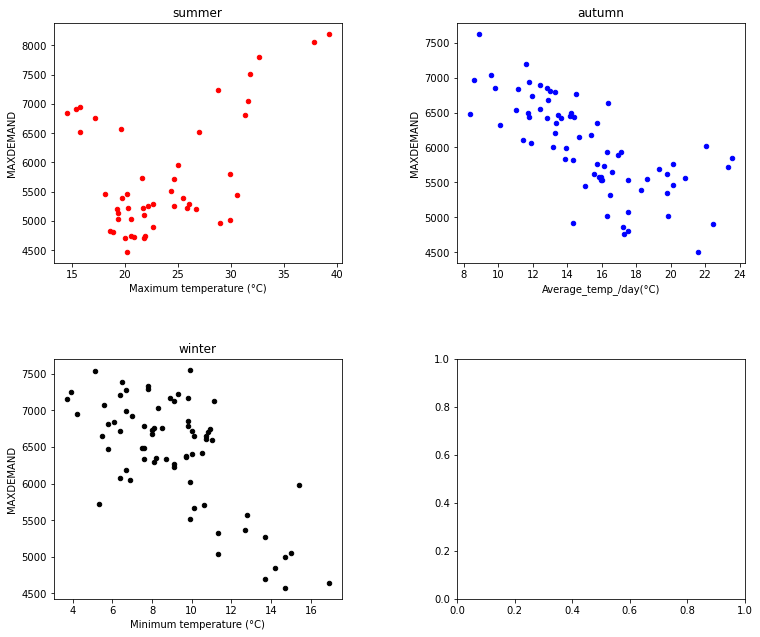

In [20]:
# Compare maxdemand during different session

fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(12,10))

ax1 = axes[0][0]
summer_start = '2020-12-01'
summer_end =  '2021-02-28'
summer = MergeData.loc[(MergeData['Date'] >= summer_start) & (MergeData['Date'] <= summer_end)]
summer.plot.scatter (x = 'Maximum temperature (°C)', y = 'MAXDEMAND', title="summer", ax = ax1, lw = 1, c = 'r')
print("Pearson r is ",summer['Maximum temperature (°C)'].corr(summer['MAXDEMAND']), "in summer time")


ax2 = axes[0][1]
autumn_start = '2021-3-01'
autumn_end = '2021-5-31'
autumn = MergeData.loc[(MergeData['Date'] >= autumn_start) & (MergeData['Date'] <= autumn_end)]
autumn.plot.scatter (x = 'Average_temp_/day(°C)', y = 'MAXDEMAND',title="autumn", ax = ax2, lw = 1, c = 'b')
print("Pearson r is ",autumn['Average_temp_/day(°C)'].corr(autumn['MAXDEMAND']), "in Autumn time")


ax3 = axes[1][0]
winter_start = '2021-06-01'
winter_end = '2021-08-31'
winter = MergeData.loc[(MergeData['Date'] >= '2021-06-01') & (MergeData['Date'] <= '2021-08-31') ]
winter.plot.scatter (x = 'Minimum temperature (°C)', y = 'MAXDEMAND',title="winter", ax = ax3, lw = 1, c = 'k')
print("Pearson r is ",winter['Minimum temperature (°C)'].corr(winter['MAXDEMAND']), "in winter time")


plt.subplots_adjust(left=0.1,bottom=0.1, right=0.9, top=0.9, wspace=0.4, hspace=0.4)
plt.show()

In [21]:
#Make a MATRIX1
FEACHERS = (['MAXDEMAND','Minimum temperature (°C)','Maximum temperature (°C)','Rainfall (mm)',
            'Evaporation (mm)','Sunshine (hours)','Speed of maximum wind gust (km/h)',
            'Time of maximum wind gust','9am Temperature (°C)','9am relative humidity (%)'])
MergeData[FEACHERS].corr(method = 'pearson')

,MAXDEMAND,Minimum temperature (°C),Maximum temperature (°C),Rainfall (mm),Evaporation (mm),Sunshine (hours),Speed of maximum wind gust (km/h),9am Temperature (°C),9am relative humidity (%)
MAXDEMAND,1.000000,-0.473554,-0.255099,-0.102213,-0.245547,-0.168017,0.110848,-0.359269,0.097664
Minimum temperature (°C),-0.473554,1.000000,0.701584,0.058010,0.650019,0.117211,0.002160,0.910744,-0.327113
Maximum temperature (°C),-0.255099,0.701584,1.000000,-0.122528,0.626420,0.489657,-0.088700,0.818239,-0.304566
Rainfall (mm),-0.102213,0.058010,-0.122528,1.000000,-0.067168,-0.118420,0.013371,-0.018478,0.190563
Evaporation (mm),-0.245547,0.650019,0.626420,-0.067168,1.000000,0.306203,0.115854,0.707067,-0.539895
Sunshine (hours),-0.168017,0.117211,0.489657,-0.118420,0.306203,1.000000,-0.034018,0.224974,-0.262985
Speed of maximum wind gust (km/h),0.110848,0.002160,-0.088700,0.013371,0.115854,-0.034018,1.000000,0.075885,-0.337354
9am Temperature (°C),-0.359269,0.910744,0.818239,-0.018478,0.707067,0.224974,0.075885,1.000000,-0.478083
9am relative humidity (%),0.097664,-0.327113,-0.304566,0.190563,-0.539895,-0.262985,-0.337354,-0.478083,1.000000


In [23]:
#Make a MATRIX2
FEACHERS = (['MAXDEMAND','9am cloud amount (oktas)','9am wind speed (km/h)','9am MSL pressure (hPa)',
             '3pm Temperature (°C)','3pm relative humidity (%)','3pm cloud amount (oktas)',
            '3pm wind speed (km/h)','3pm MSL pressure (hPa)'])
MergeData[FEACHERS].corr(method = 'pearson')

,MAXDEMAND,9am cloud amount (oktas),9am wind speed (km/h),9am MSL pressure (hPa),3pm Temperature (°C),3pm relative humidity (%),3pm cloud amount (oktas),3pm wind speed (km/h),3pm MSL pressure (hPa)
MAXDEMAND,1.000000,-0.156732,0.148167,0.044849,-0.282463,0.054049,0.084189,-0.019650,-0.018023
9am cloud amount (oktas),-0.156732,1.000000,-0.056089,-0.172483,-0.211235,0.452825,0.409234,-0.030351,-0.100721
9am wind speed (km/h),0.148167,-0.056089,1.000000,-0.214598,-0.112984,-0.161492,0.010879,0.371188,-0.231067
9am MSL pressure (hPa),0.044849,-0.172483,-0.214598,1.000000,-0.025741,-0.152818,-0.296555,-0.103746,0.960922
3pm Temperature (°C),-0.282463,-0.211235,-0.112984,-0.025741,1.000000,-0.571804,-0.280805,-0.027133,-0.121473
3pm relative humidity (%),0.054049,0.452825,-0.161492,-0.152818,-0.571804,1.000000,0.383701,-0.179711,-0.044552
3pm cloud amount (oktas),0.084189,0.409234,0.010879,-0.296555,-0.280805,0.383701,1.000000,-0.112564,-0.237224
3pm wind speed (km/h),-0.019650,-0.030351,0.371188,-0.103746,-0.027133,-0.179711,-0.112564,1.000000,-0.184127
3pm MSL pressure (hPa),-0.018023,-0.100721,-0.231067,0.960922,-0.121473,-0.044552,-0.237224,-0.184127,1.000000


Text(0.5, 1.0, 'Corrilation Map to explain the strength of relationship')

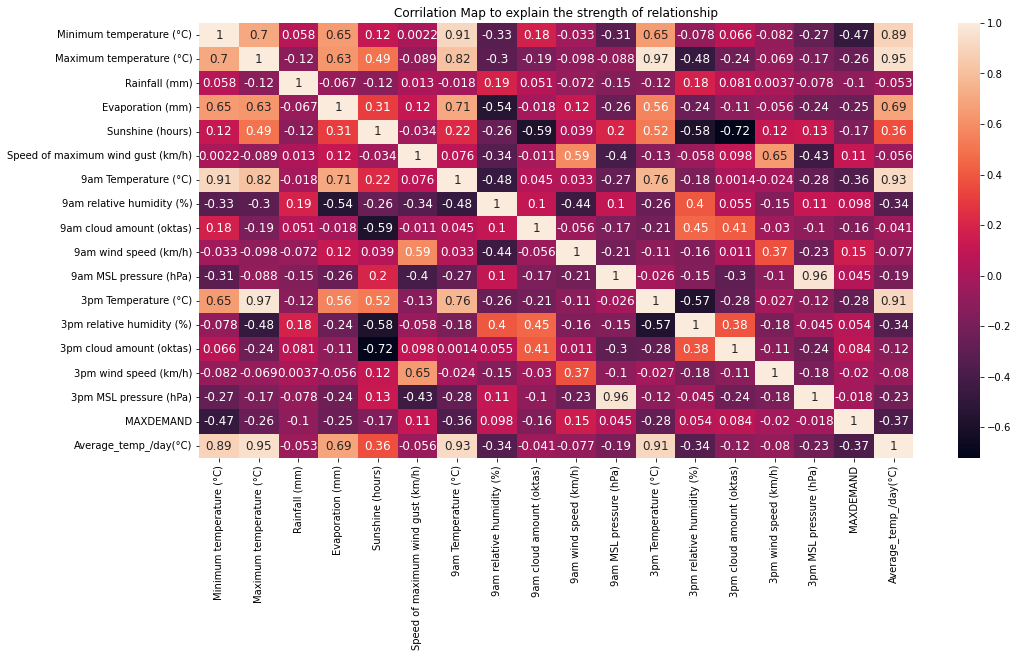

In [24]:
# Corrilarion values- Strong positive corrilations has light colour, negative corrilations has dark colour.
plt.figure(figsize=(16,8))
sns.heatmap(MergeData.corr(), annot = True, annot_kws={"size":12})

plt.title("Corrilation Map to explain the strength of relationship")
#sns.heatmap(MergeData, annot=True, fmt=".lf", linewidth=5, square=True, cmap='Blues_r')


<AxesSubplot:xlabel='Maximum temperature (°C)', ylabel='MAXDEMAND'>

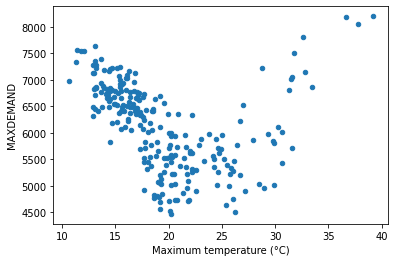

In [26]:
MergeData.plot.scatter (x = 'Maximum temperature (°C)',
                        y = 'MAXDEMAND')

In [27]:
#When the weather is extramly low or exreamly high, then the total demand increases, as people use the energy to maintain the temperature.

<AxesSubplot:xlabel='3pm Temperature (°C)', ylabel='MAXDEMAND'>

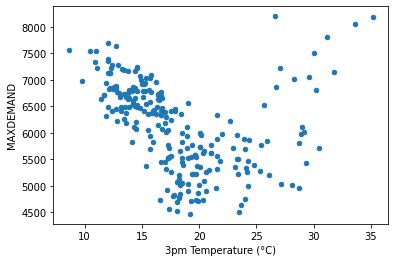

In [28]:
MergeData.plot.scatter (x = '3pm Temperature (°C)',
                        y = 'MAXDEMAND')


In [29]:
# 3 pm is the time that the temperature goes up in summer.Therefore this chart was plotted to give a random idea on energy demand.


<AxesSubplot:xlabel='Minimum temperature (°C)', ylabel='MAXDEMAND'>

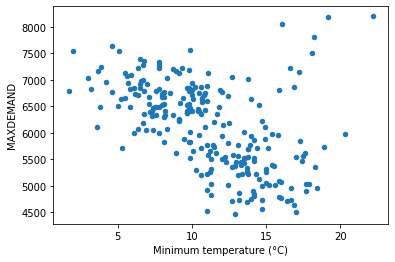

In [30]:
MergeData.plot.scatter (x = 'Minimum temperature (°C)',
                        y = 'MAXDEMAND')

In [31]:
Data_p

,REGION,SETTLEMENTDATE,TOTALDEMAND,PRICECATEGORY,Date
0,VIC1,1/01/2021 0:30,4179.21,LOW,2021-01-01
1,VIC1,1/01/2021 1:00,4047.76,LOW,2021-01-01
2,VIC1,1/01/2021 1:30,3934.70,LOW,2021-01-01
3,VIC1,1/01/2021 2:00,3766.45,LOW,2021-01-01
4,VIC1,1/01/2021 2:30,3590.37,LOW,2021-01-01
...,...,...,...,...,...
11659,VIC1,31/08/2021 22:00,4861.91,MEDIUM,2021-08-31
11660,VIC1,31/08/2021 22:30,4748.74,MEDIUM,2021-08-31
11661,VIC1,31/08/2021 23:00,4620.09,MEDIUM,2021-08-31
11662,VIC1,31/08/2021 23:30,4834.00,MEDIUM,2021-08-31


In [32]:
Data_p.info()
#Data_p.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11664 entries, 0 to 11663
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   REGION          11664 non-null  object        
 1   SETTLEMENTDATE  11664 non-null  object        
 2   TOTALDEMAND     11664 non-null  float64       
 3   PRICECATEGORY   11664 non-null  object        
 4   Date            11664 non-null  datetime64[ns]
dtypes: datetime64[ns](1), float64(1), object(3)
memory usage: 455.8+ KB


In [33]:
def bin_rating(x):
    """
   Equal length descritisation.
    
        [min, 4080.605), [4080.605, 5452.68), [5452.68, 6824.755 ) [6824.755, max]
        
        min = 2708.53
        max = 8196.83

    
    """
    LOWER = 4080.605

    MID = 5452.68
    
    UPPER = 6824.755

    
    # [min, 4080.605)
    if x < LOWER:        
        return 1
    
    #  [4080.605, 5452.68)
    elif LOWER <= x < MID:
        return 2 
    
    #  [5452.68, 6824.755 ) 
   
    elif MID <= x < UPPER:
        return 3

   #[6824.755, max]
    return 4

# apply the function on the series
MergeData['bin_rating'] = MergeData['MAXDEMAND'].apply(bin_rating)

# also, print out the min/max for this feature
MergeData

,Date,Minimum temperature (°C),Maximum temperature (°C),Rainfall (mm),Evaporation (mm),Sunshine (hours),Direction of maximum wind gust,Speed of maximum wind gust (km/h),Time of maximum wind gust,9am Temperature (°C),...,9am MSL pressure (hPa),3pm Temperature (°C),3pm relative humidity (%),3pm cloud amount (oktas),3pm wind direction,3pm wind speed (km/h),3pm MSL pressure (hPa),MAXDEMAND,Average_temp_/day(°C),bin_rating
0,2021-01-01,15.6,29.9,0.0,2.8,9.3,NNE,31.0,13:14,19.2,...,1018.8,28.1,43,5.0,E,13,1015.3,5019.64,22.75,2
1,2021-02-01,18.4,29.0,0.0,9.4,1.3,NNW,30.0,8:22,23.3,...,1013.3,28.7,38,7.0,SW,4,1008.5,4964.35,23.70,2
2,2021-03-01,17.0,26.2,12.6,4.8,7.1,WSW,33.0,17:55,18.3,...,1007.7,23.5,59,4.0,SSW,2,1005.2,4503.31,21.60,2
3,2021-04-01,16.0,18.6,2.6,3.8,0.0,SSE,41.0,16:03,16.2,...,1010.0,18.2,82,8.0,SSW,17,1011.0,4764.18,17.30,2
4,2021-05-01,15.9,19.1,11.2,1.0,0.0,SSE,35.0,11:02,17.2,...,1012.5,18.2,82,8.0,SSE,19,1013.3,4800.64,17.50,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
238,2021-08-27,4.6,13.6,0.0,1.2,3.8,SSW,15.0,12:18,7.7,...,1020.0,12.8,65,7.0,SSE,7,1017.4,6769.89,9.10,3
239,2021-08-28,5.3,17.8,0.0,1.6,9.6,N,39.0,13:14,9.1,...,1018.6,17.4,31,3.0,NNW,24,1013.5,5716.32,11.55,3
240,2021-08-29,9.1,16.2,0.6,6.4,4.3,NNE,33.0,1:50,10.6,...,1011.4,12.8,84,7.0,S,6,1010.4,6227.89,12.65,3
241,2021-08-30,6.4,17.6,4.0,1.4,7.4,NNW,50.0,14:04,11.1,...,1016.1,16.8,45,1.0,NNW,28,1013.2,6072.91,12.00,3


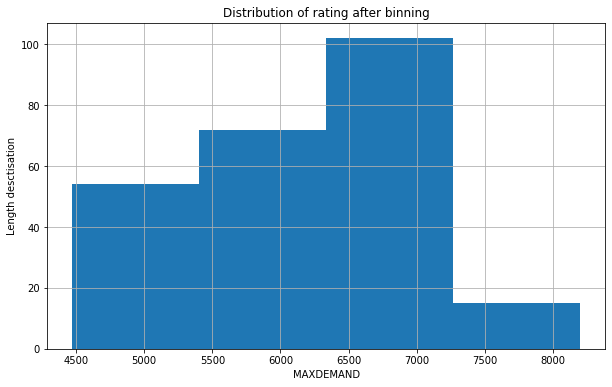

In [34]:
# Length Descretization
MergeData.MAXDEMAND.hist(bins = 4, figsize = (10,6))
plt.xlabel("MAXDEMAND")
plt.ylabel("Length desctisation")
plt.title('Distribution of rating after binning')


plt.show()

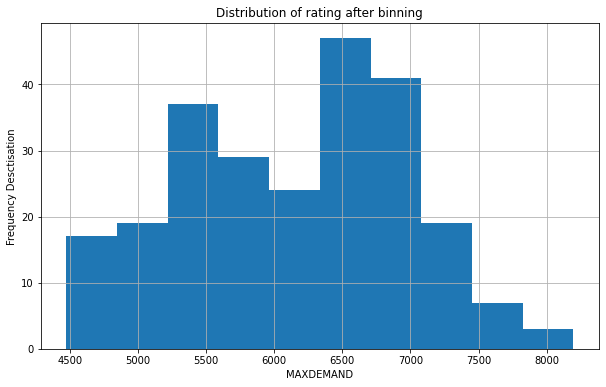

In [35]:
# Frequency Descretization
             
MergeData.MAXDEMAND.hist(bins = 10, figsize = (10,6))
plt.xlabel("MAXDEMAND")
plt.ylabel("Frequency Desctisation")
plt.title('Distribution of rating after binning')


plt.show()

## Model accuracy test by K-nearest neighbor classifier

In [36]:
# # load in the dataset and randomly divide it into training and test sets. We also normalise the data.

features = MergeData[['Minimum temperature (°C)','Maximum temperature (°C)','Rainfall (mm)','Evaporation (mm)','Sunshine (hours)','Speed of maximum wind gust (km/h)']].astype(float)
features

,Minimum temperature (°C),Maximum temperature (°C),Rainfall (mm),Evaporation (mm),Sunshine (hours),Speed of maximum wind gust (km/h)
0,15.6,29.9,0.0,2.8,9.3,31.0
1,18.4,29.0,0.0,9.4,1.3,30.0
2,17.0,26.2,12.6,4.8,7.1,33.0
3,16.0,18.6,2.6,3.8,0.0,41.0
4,15.9,19.1,11.2,1.0,0.0,35.0
...,...,...,...,...,...,...
238,4.6,13.6,0.0,1.2,3.8,15.0
239,5.3,17.8,0.0,1.6,9.6,39.0
240,9.1,16.2,0.6,6.4,4.3,33.0
241,6.4,17.6,4.0,1.4,7.4,50.0


In [42]:

train_test_split(features,classlabel, train_size=0.66, test_size=0.34, random_state=42)

[     Minimum temperature (°C)  Maximum temperature (°C)  Rainfall (mm)  \
 168                       6.1                      13.2            1.6   
 206                       8.1                      16.4            0.0   
 144                      10.6                      20.9            0.0   
 31                       13.4                      20.3            0.0   
 12                       14.5                      27.0            0.0   
 ..                        ...                       ...            ...   
 106                      12.3                      17.7            0.0   
 14                       13.2                      20.6            0.0   
 92                       15.1                      31.6            0.0   
 179                       4.2                      16.7            0.0   
 102                       7.8                      20.0            0.6   
 
      Evaporation (mm)  Sunshine (hours)  Speed of maximum wind gust (km/h)  
 168               1

In [41]:
# STEP 0: Preprocessing 

##get just the class labels
classlabel=MergeData['MAXDEMAND']

##randomly select 66% of the instances to be training and the rest to be testing
X_train, X_test, y_train, y_test = train_test_split(features,classlabel, train_size=0.66, test_size=0.34, random_state=42)

#computation of distances between instances
scaler = preprocessing.StandardScaler().fit(X_train)   # MinMaxScaler()
X_train=scaler.transform(X_train)
X_test=scaler.transform(X_test)

In [39]:
X_train.shape

(160, 6)

In [40]:
# STEP 1: Instantiation

knn = neighbors.KNeighborsClassifier(n_neighbors=5)

# STEP 2: Fitting data/Training Data

knn.fit(X_train, y_train)

ValueError: Input contains NaN, infinity or a value too large for dtype('float64').

In [ ]:
# STEP 3: Prediction /  Test

y_pred=knn.predict(X_test)

# STEP 4: Evaluation (Accuracy, precision recall fl)

print(accuracy_score(y_test, y_pred))